**Load the Dataset**

**Dataset is in Google Drive Link**


1.   Download the dataset from the given Drive Link and upload it to the colab drive.
2. Then Start Implementing the below cells

In [ ]:
from google.colab import files
import pandas as pd
import os

# Step 1: Load the dataset into the drive. Check the correct dataset file name.
file_name = "PANCANCER_ANOVA_Mon Aug 26 04_44_50 2024.csv"  # Replace with the correct name if different
data = pd.read_csv(file_name)

# Step 2: Display the first few rows of the dataset
print(data.head())


      Drug name  Drug ID Drug target   Target Pathway Feature Name  \
0  Camptothecin     1003        TOP1  DNA replication    ABCB1_mut   
1  Camptothecin     1003        TOP1  DNA replication     ABL2_mut   
2  Camptothecin     1003        TOP1  DNA replication    ACACA_mut   
3  Camptothecin     1003        TOP1  DNA replication   ACVR1B_mut   
4  Camptothecin     1003        TOP1  DNA replication   ACVR2A_mut   

   n_feature_pos  n_feature_neg  ic50_effect_size  log_ic50_mean_pos  \
0             16            949          0.559182          -1.248911   
1              7            958          0.373240          -2.938700   
2             11            954          0.159295          -1.968064   
3              3            962          0.984940          -0.454658   
4             22            943          0.038353          -2.188707   

   log_ic50_mean_neg  ...  feature_ic50_t_pval  feature_delta_mean_ic50  \
0          -2.274636  ...             0.020317                 1.025725

**Understand the Dataset Structure**

In [ ]:
import pandas as pd

# Assuming the dataset has already been loaded into the 'data' DataFrame
print("Column names in the dataset:")
print(data.columns.tolist())


Column names in the dataset:
['Drug name', 'Drug ID', 'Drug target', 'Target Pathway', 'Feature Name', 'n_feature_pos', 'n_feature_neg', 'ic50_effect_size', 'log_ic50_mean_pos', 'log_ic50_mean_neg', 'log_max_conc_tested', 'log_max_conc_tested_2', 'feature_ic50_t_pval', 'feature_delta_mean_ic50', 'feature_pos_ic50_var', 'feature_neg_ic50_var', 'feature_pval', 'tissue_pval', 'msi_pval', 'fdr', 'Tissue Type', 'Screening Set']


In [ ]:
# Display the first few rows of the dataset
print(data.head())

# Step 9: Display the column names to understand the features and labels
print("Column names in the dataset:")
print(data.columns)

# Step 10: Separate features and labels (choosing the correct target column)
# Replace 'log_ic50_mean_pos' with the actual target column you want to use
target_column = 'log_ic50_mean_pos'  # Choose the correct target column

# Ensure the target column exists in the dataset
if target_column in data.columns:
    features = data.drop([target_column], axis=1)  # Drop the target column to get features
    labels = data[target_column]  # Extract the target column
    print("Features and labels separated successfully.")

    # Step 11: Display the shape of the features and labels
    print(f"Features shape: {features.shape}")
    print(f"Labels shape: {labels.shape}")
else:
    print(f"'{target_column}' column not found. Please check the dataset.")


      Drug name  Drug ID Drug target   Target Pathway Feature Name  \
0  Camptothecin     1003        TOP1  DNA replication    ABCB1_mut   
1  Camptothecin     1003        TOP1  DNA replication     ABL2_mut   
2  Camptothecin     1003        TOP1  DNA replication    ACACA_mut   
3  Camptothecin     1003        TOP1  DNA replication   ACVR1B_mut   
4  Camptothecin     1003        TOP1  DNA replication   ACVR2A_mut   

   n_feature_pos  n_feature_neg  ic50_effect_size  log_ic50_mean_pos  \
0             16            949          0.559182          -1.248911   
1              7            958          0.373240          -2.938700   
2             11            954          0.159295          -1.968064   
3              3            962          0.984940          -0.454658   
4             22            943          0.038353          -2.188707   

   log_ic50_mean_neg  ...  feature_ic50_t_pval  feature_delta_mean_ic50  \
0          -2.274636  ...             0.020317                 1.025725

**Sample Size**

In [ ]:
# Sample size
num_samples = data.shape[0]
print(f"Number of samples: {num_samples}")

# Assuming each row corresponds to a specific cell line and drug pair
# If there's a specific column for drug identifiers, use it
num_drugs = data['Drug_ID'].nunique() if 'Drug_ID' in data.columns else "Unknown"
print(f"Number of unique drugs tested: {num_drugs}")


Number of samples: 200920
Number of unique drugs tested: Unknown


**Summary Statistics**

In [ ]:
# Summary statistics for the features
print(features.describe())

# Summary statistics for the labels
print(labels.describe())


             Drug ID  n_feature_pos  n_feature_neg  ic50_effect_size  \
count  200920.000000  200920.000000  200920.000000     200920.000000   
mean     1610.531037      34.855405     791.769943          0.253858   
std       395.541738      54.930382     161.380092          0.210719   
min      1003.000000       3.000000      79.000000          0.000001   
25%      1180.000000       9.000000     702.000000          0.098224   
50%      1713.000000      18.000000     852.000000          0.205234   
75%      1911.000000      39.000000     927.000000          0.354937   
max      2499.000000     629.000000     963.000000          6.030565   

       log_ic50_mean_neg  log_max_conc_tested  log_max_conc_tested_2  \
count      200920.000000                  0.0                    0.0   
mean            2.840064                  NaN                    NaN   
std             2.350248                  NaN                    NaN   
min            -5.325046                  NaN                  

**Check for Missing Values**

Missing values in each column:
Drug name                       0
Drug ID                         0
Drug target                 27155
Target Pathway               1362
Feature Name                    0
n_feature_pos                   0
n_feature_neg                   0
ic50_effect_size                0
log_ic50_mean_pos               0
log_ic50_mean_neg               0
log_max_conc_tested        200920
log_max_conc_tested_2      200920
feature_ic50_t_pval             0
feature_delta_mean_ic50         0
feature_pos_ic50_var            0
feature_neg_ic50_var            0
feature_pval                    0
tissue_pval                     0
msi_pval                        0
fdr                             0
Tissue Type                     0
Screening Set                   0
dtype: int64


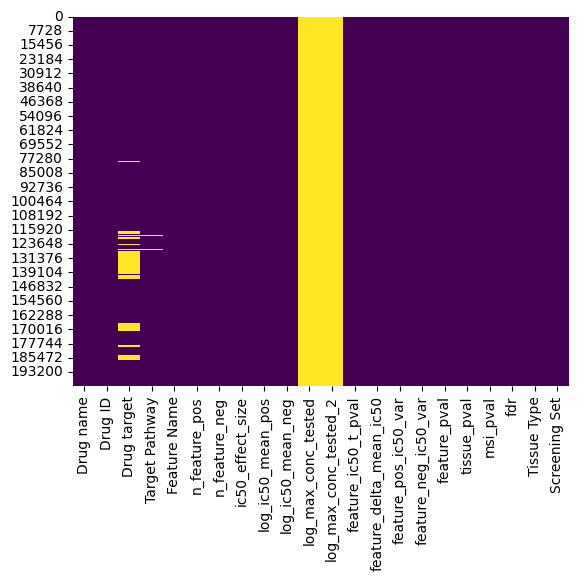

In [ ]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Optionally, visualize missing data if any
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()


**Distribution of Labels**

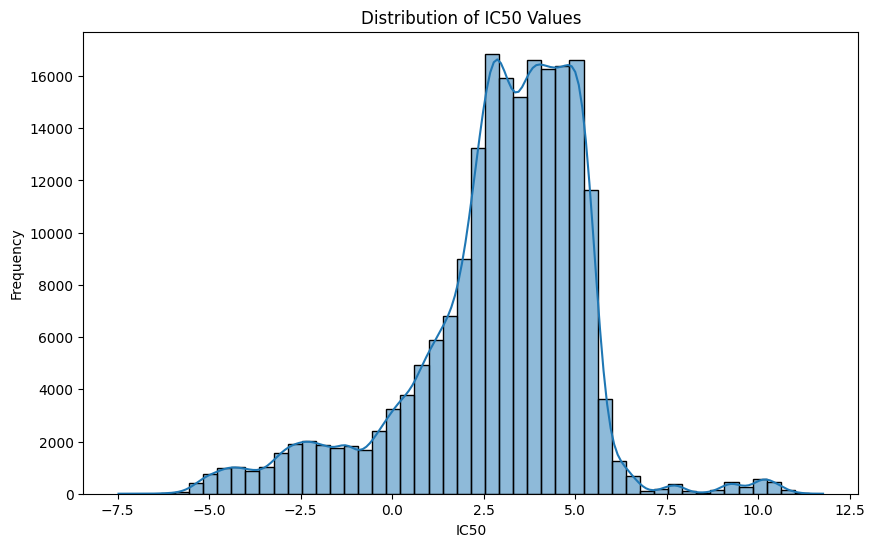

In [ ]:
# Plot the distribution of IC50 values
plt.figure(figsize=(10, 6))
sns.histplot(labels, bins=50, kde=True)
plt.title('Distribution of IC50 Values')
plt.xlabel('IC50')
plt.ylabel('Frequency')
plt.show()




```
# This is formatted as code
```

**Correlation Matrix**

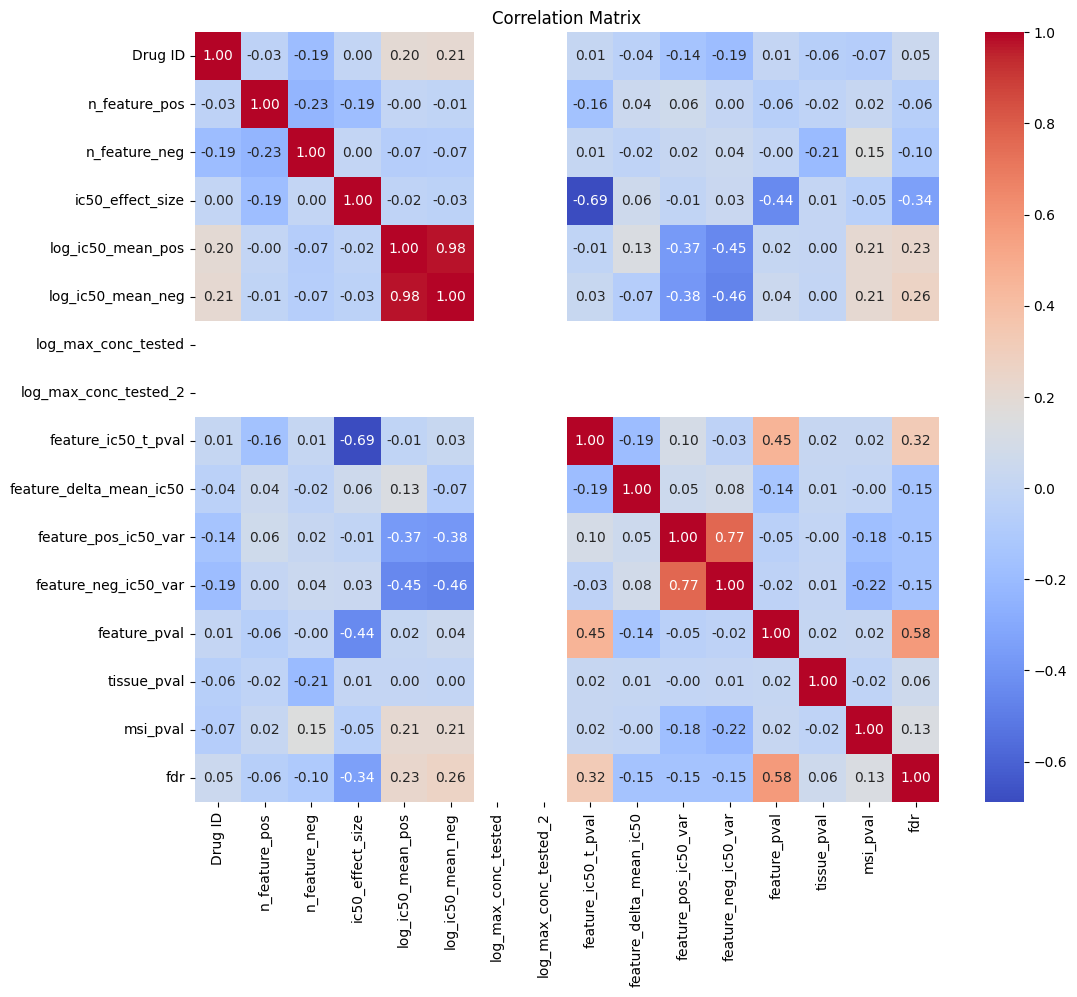

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



**Data Preprocessing**

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Separate numeric and non-numeric columns
numeric_features = features.select_dtypes(include=[float, int])
non_numeric_features = features.select_dtypes(exclude=[float, int])

# Identify columns with all missing values and drop them
columns_to_drop = numeric_features.columns[numeric_features.isnull().all()]
print(f"Columns with all missing values: {columns_to_drop.tolist()}")
numeric_features = numeric_features.drop(columns=columns_to_drop)

# Impute missing data in numeric columns
imputer_numeric = SimpleImputer(strategy='mean')
numeric_features_imputed = imputer_numeric.fit_transform(numeric_features)

# Convert the imputed numeric features back to a DataFrame
numeric_features_imputed_df = pd.DataFrame(numeric_features_imputed, columns=numeric_features.columns)

# Optionally, handle missing data in non-numeric columns
imputer_non_numeric = SimpleImputer(strategy='most_frequent')
non_numeric_features_imputed = imputer_non_numeric.fit_transform(non_numeric_features)

# Convert the imputed non-numeric features back to a DataFrame
non_numeric_features_imputed_df = pd.DataFrame(non_numeric_features_imputed, columns=non_numeric_features.columns)

# Combine the numeric and non-numeric data back into one DataFrame
features_imputed = pd.concat([numeric_features_imputed_df, non_numeric_features_imputed_df], axis=1)

# Impute missing values in the labels (if necessary)
labels_imputed = labels.fillna(labels.mean())  # Or use other imputation strategies

# Display the result
print(features_imputed.head())
print(labels_imputed.head())


Columns with all missing values: ['log_max_conc_tested', 'log_max_conc_tested_2']
   Drug ID  n_feature_pos  n_feature_neg  ic50_effect_size  log_ic50_mean_neg  \
0   1003.0           16.0          949.0          0.559182          -2.274636   
1   1003.0            7.0          958.0          0.373240          -2.252653   
2   1003.0           11.0          954.0          0.159295          -2.260968   
3   1003.0            3.0          962.0          0.984940          -2.263252   
4   1003.0           22.0          943.0          0.038353          -2.259237   

   feature_ic50_t_pval  feature_delta_mean_ic50  feature_pos_ic50_var  \
0             0.020317                 1.025725              1.571565   
1             0.406394                -0.686047              2.029013   
2             0.531192                 0.292904              1.486441   
3             0.291788                 1.808593              2.208877   
4             0.816522                 0.070530              1.380

**Normalization/Scaling**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Separate numeric and non-numeric columns
numeric_features = features_imputed.select_dtypes(include=[float, int])
non_numeric_features = features_imputed.select_dtypes(exclude=[float, int])

# Standardize the numeric features (mean=0, variance=1)
scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features)

# Convert the scaled numeric features back to a DataFrame
numeric_features_scaled_df = pd.DataFrame(numeric_features_scaled, columns=numeric_features.columns)

# Recombine the scaled numeric features with the non-numeric features
features_scaled = pd.concat([numeric_features_scaled_df, non_numeric_features.reset_index(drop=True)], axis=1)

# Display the first few rows of the scaled features
print(features_scaled.head())


    Drug ID  n_feature_pos  n_feature_neg  ic50_effect_size  \
0 -1.535951      -0.343261       0.974287          1.448962   
1 -1.535951      -0.507105       1.030056          0.566544   
2 -1.535951      -0.434285       1.005269         -0.448762   
3 -1.535951      -0.579925       1.054842          3.469465   
4 -1.535951      -0.234031       0.937107         -1.022714   

   log_ic50_mean_neg  feature_ic50_t_pval  feature_delta_mean_ic50  \
0          -2.176244            -1.222666                 1.928038   
1          -2.166890             0.027389                -1.616561   
2          -2.170429             0.431462                 0.410572   
3          -2.171400            -0.343689                 3.549139   
4          -2.169692             1.355314                -0.049901   

   feature_pos_ic50_var  feature_neg_ic50_var  feature_pval  tissue_pval  \
0              0.494846              0.999705     -1.348527     -0.05763   
1              1.362291              0.996551   

**Feature Selection** ANOVA (for categorical labels)

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

# Ensure only numeric columns are used for feature selection
numeric_features_scaled = features_scaled.select_dtypes(include=[float, int])

# Example: Select all available features
selector = SelectKBest(score_func=f_classif, k='all')
features_selected = selector.fit_transform(numeric_features_scaled, labels_imputed)

# Get the names of the selected features
selected_features = numeric_features_scaled.columns[selector.get_support(indices=True)]
features_selected_df = pd.DataFrame(features_selected, columns=selected_features)

print("Selected features using ANOVA F-test:")
print(selected_features)


Selected features using ANOVA F-test:
Index(['Drug ID', 'n_feature_pos', 'n_feature_neg', 'ic50_effect_size',
       'log_ic50_mean_neg', 'feature_ic50_t_pval', 'feature_delta_mean_ic50',
       'feature_pos_ic50_var', 'feature_neg_ic50_var', 'feature_pval',
       'tissue_pval', 'msi_pval', 'fdr'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


PCA (for continuous labels)

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

# Ensure only numeric columns are used for PCA
numeric_features_scaled = features_scaled.select_dtypes(include=[float, int])

# Adjust the number of components if necessary
n_components = min(20, numeric_features_scaled.shape[1])

# Apply PCA
pca = PCA(n_components=n_components)
features_pca = pca.fit_transform(numeric_features_scaled)

# Convert the PCA components back to a DataFrame
features_pca_df = pd.DataFrame(features_pca, columns=[f'PC{i+1}' for i in range(features_pca.shape[1])])

print("Explained variance by each principal component:")
print(pca.explained_variance_ratio_)



Explained variance by each principal component:
[0.20249923 0.16688106 0.10753119 0.08811072 0.0825922  0.07142875
 0.06499459 0.06158933 0.04797264 0.04563708 0.02785315 0.02024303
 0.01266704]


**All Together**

In [ ]:
# List all column names to verify the target column name
print(data.columns)


Index(['Drug name', 'Drug ID', 'Drug target', 'Target Pathway', 'Feature Name',
       'n_feature_pos', 'n_feature_neg', 'ic50_effect_size',
       'log_ic50_mean_pos', 'log_ic50_mean_neg', 'log_max_conc_tested',
       'log_max_conc_tested_2', 'feature_ic50_t_pval',
       'feature_delta_mean_ic50', 'feature_pos_ic50_var',
       'feature_neg_ic50_var', 'feature_pval', 'tissue_pval', 'msi_pval',
       'fdr', 'Tissue Type', 'Screening Set'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

def preprocess_data(data, target_column, feature_selection_method='PCA', n_features=20):
    # Check if the target column exists
    if target_column not in data.columns:
        raise ValueError(f"Target column '{target_column}' not found in the dataset. Available columns: {data.columns.tolist()}")

    # Separate features and labels
    features = data.drop([target_column], axis=1)
    labels = data[target_column]

    # Drop columns with all missing values
    features = features.dropna(axis=1, how='all')

    # Separate numeric and non-numeric columns
    numeric_features = features.select_dtypes(include=[float, int])
    non_numeric_features = features.select_dtypes(exclude=[float, int])

    # Impute missing data in numeric columns
    imputer = SimpleImputer(strategy='mean')
    numeric_features_imputed = imputer.fit_transform(numeric_features)

    # Convert imputed numeric features back to a DataFrame
    numeric_features_imputed_df = pd.DataFrame(numeric_features_imputed, columns=numeric_features.columns)

    # Recombine imputed numeric features with non-numeric features
    features_imputed = pd.concat([numeric_features_imputed_df, non_numeric_features.reset_index(drop=True)], axis=1)

    # Impute missing values in the labels (if necessary)
    labels_imputed = labels.fillna(labels.mean())

    # Normalize/Scale the numeric features
    scaler = StandardScaler()
    numeric_features_scaled = scaler.fit_transform(numeric_features_imputed_df)

    # Recombine scaled numeric features with non-numeric features
    features_scaled = pd.concat([pd.DataFrame(numeric_features_scaled, columns=numeric_features.columns),
                                 non_numeric_features.reset_index(drop=True)], axis=1)

    # Feature selection
    if feature_selection_method == 'ANOVA':
        selector = SelectKBest(score_func=f_classif, k=n_features)
        features_selected = selector.fit_transform(numeric_features_scaled, labels_imputed)
        selected_features = numeric_features.columns[selector.get_support(indices=True)]
        features_final = pd.DataFrame(features_selected, columns=selected_features)
    elif feature_selection_method == 'PCA':
        n_components = min(n_features, numeric_features_scaled.shape[1])
        pca = PCA(n_components=n_components)
        features_pca = pca.fit_transform(numeric_features_scaled)
        features_final = pd.DataFrame(features_pca, columns=[f'PC{i+1}' for i in range(features_pca.shape[1])])

    return features_final, labels_imputed

# Example usage with the correct target column
features_final, labels_final = preprocess_data(data, target_column='log_ic50_mean_pos', feature_selection_method='PCA', n_features=20)

# Display the resulting DataFrames
print(features_final.head())
print(labels_final.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.602448 -0.442963 -0.981279 -0.424865  0.852874 -1.161547 -0.322161   
1  0.726308 -2.739667 -1.287038  0.907204  0.746637  1.557825  0.419581   
2  0.276560 -2.637499 -1.095171 -0.062205  0.705189 -0.427135 -0.347196   
3  4.133918 -0.860121 -1.133253 -0.140167  1.451201 -2.613262  0.889767   
4  0.395958 -2.622670 -1.031985 -0.216608  0.252723  0.054606 -1.501981   

        PC8       PC9      PC10      PC11      PC12      PC13  
0 -1.344653  0.378510 -0.061140 -0.940698  0.332823  0.267902  
1 -1.601779  0.786287  0.239087 -0.085841  0.615880 -0.276647  
2 -1.789091  0.796247  0.151291 -0.330491  0.006906  0.145155  
3 -1.523768  0.215349 -0.257496 -0.329176  2.411154  1.000934  
4 -0.798512  0.389995 -0.264269 -1.054601 -0.095897  0.565944  
0   -1.248911
1   -2.938700
2   -1.968064
3   -0.454658
4   -2.188707
Name: log_ic50_mean_pos, dtype: float64


**Defining the Search Space**

In [ ]:
import torch.nn as nn
import random

# Define the search space as a dictionary
search_space = {
    'layer_types': ['dense', 'conv', 'recurrent'],  # Types of layers
    'layer_sizes': [32, 64, 128, 256],             # Number of neurons or filters
    'activation_functions': ['relu', 'sigmoid', 'tanh'],  # Activation functions
    'dropout_rates': [0.2, 0.3, 0.4, 0.5]          # Dropout rates for regularization
}

# Function to sample a random architecture from the search space
def sample_architecture(search_space):
    architecture = {
        'layers': [],
        'activation_functions': [],
        'dropout_rates': []
    }

    # Example: A simple architecture with 3 layers
    for _ in range(3):
        layer_type = random.choice(search_space['layer_types'])
        layer_size = random.choice(search_space['layer_sizes'])
        activation = random.choice(search_space['activation_functions'])
        dropout_rate = random.choice(search_space['dropout_rates'])

        architecture['layers'].append({
            'type': layer_type,
            'size': layer_size
        })
        architecture['activation_functions'].append(activation)
        architecture['dropout_rates'].append(dropout_rate)

    return architecture

# Example of sampling a random architecture
sampled_architecture = sample_architecture(search_space)
print("Sampled Architecture:")
print(sampled_architecture)


Sampled Architecture:
{'layers': [{'type': 'recurrent', 'size': 128}, {'type': 'recurrent', 'size': 32}, {'type': 'conv', 'size': 256}], 'activation_functions': ['relu', 'sigmoid', 'sigmoid'], 'dropout_rates': [0.5, 0.4, 0.5]}


**Constructing the Neural Network Model Based on Sampled Architecture**

In [ ]:
import torch
import torch.nn as nn

# Function to build a model based on the sampled architecture
class CustomModel(nn.Module):
    def __init__(self, architecture):
        super(CustomModel, self).__init__()
        layers = []
        input_size = 100  # Example input size, you should adjust this based on your dataset

        for i, layer in enumerate(architecture['layers']):
            layer_type = layer['type']
            layer_size = layer['size']
            activation_function = architecture['activation_functions'][i]
            dropout_rate = architecture['dropout_rates'][i]

            if layer_type == 'dense':
                layers.append(nn.Linear(input_size, layer_size))
                input_size = layer_size  # Update input size for the next layer
            elif layer_type == 'conv':
                layers.append(nn.Conv2d(in_channels=1, out_channels=layer_size, kernel_size=3, padding=1))
                layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
                input_size = layer_size  # This needs to be updated according to the output size of conv layers
            elif layer_type == 'recurrent':
                layers.append(nn.LSTM(input_size, layer_size, batch_first=True))
                input_size = layer_size

            # Add activation function
            if activation_function == 'relu':
                layers.append(nn.ReLU())
            elif activation_function == 'sigmoid':
                layers.append(nn.Sigmoid())
            elif activation_function == 'tanh':
                layers.append(nn.Tanh())

            # Add dropout
            layers.append(nn.Dropout(p=dropout_rate))

        # Output layer
        layers.append(nn.Linear(input_size, 10))  # Example output size is 10

        # Combine all layers
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Instantiate the model with the sampled architecture
model = CustomModel(sampled_architecture)

# Print model architecture
print(model)


CustomModel(
  (model): Sequential(
    (0): LSTM(100, 128, batch_first=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): LSTM(128, 32, batch_first=True)
    (4): Sigmoid()
    (5): Dropout(p=0.4, inplace=False)
    (6): Conv2d(1, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Sigmoid()
    (9): Dropout(p=0.5, inplace=False)
    (10): Linear(in_features=256, out_features=10, bias=True)
  )
)


**Seleceting a Search Strategy**

In [ ]:
!pip install scikit-optimize


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.7 MB/s eta 0:00:00


In [ ]:
# Install scikit-optimize
!pip install scikit-optimize

# Now you can run your main code
import random
import numpy as np
from skopt import gp_minimize
from skopt.space import Integer, Categorical, Real

# Define the search space
search_space = {
    'layer_types': ['dense', 'conv', 'recurrent'],
    'layer_sizes': [32, 64, 128, 256],
    'activation_functions': ['relu', 'sigmoid', 'tanh'],
    'dropout_rates': [0.2, 0.3, 0.4, 0.5]
}

# Placeholder evaluation function
def evaluate_architecture(architecture):
    # Simulate an evaluation score between 0 and 1
    return random.uniform(0, 1)  # Replace with actual model evaluation logic

# Random Search
def random_search(search_space, num_samples=10):
    best_architecture = None
    best_score = float('-inf')

    for _ in range(num_samples):
        architecture = sample_architecture(search_space)
        score = evaluate_architecture(architecture)

        if score > best_score:
            best_score = score
            best_architecture = architecture

    return best_architecture, best_score

# Reinforcement Learning (Q-Learning) NAS
class QLearningNAS:
    def __init__(self, search_space, num_episodes=10, learning_rate=0.1, discount_factor=0.9):
        self.search_space = search_space
        self.q_table = {}
        self.num_episodes = num_episodes
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor

    def choose_action(self, state):
        if state not in self.q_table:
            self.q_table[state] = np.zeros(len(self.search_space['layer_sizes']))

        if random.uniform(0, 1) < 0.1:  # Exploration
            action = random.choice(range(len(self.search_space['layer_sizes'])))
        else:  # Exploitation
            action = np.argmax(self.q_table[state])

        return action

    def update_q_value(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.q_table.get(next_state, np.zeros(len(self.search_space['layer_sizes']))))
        td_target = reward + self.discount_factor * self.q_table.get(next_state, np.zeros(len(self.search_space['layer_sizes'])))[best_next_action]
        td_error = td_target - self.q_table[state][action]
        self.q_table[state][action] += self.learning_rate * td_error

    def train(self):
        best_architecture = None
        best_score = float('-inf')

        for episode in range(self.num_episodes):
            state = tuple(random.choice(self.search_space[key]) for key in self.search_space)
            action = self.choose_action(state)
            architecture = {
                'layers': [{'type': 'dense', 'size': self.search_space['layer_sizes'][action]}],
                'activation_functions': [random.choice(self.search_space['activation_functions'])],
                'dropout_rates': [random.choice(self.search_space['dropout_rates'])]
            }
            score = evaluate_architecture(architecture)
            reward = score

            if score > best_score:
                best_score = score
                best_architecture = architecture

            next_state = state  # In more complex cases, update this
            self.update_q_value(state, action, reward, next_state)

        return best_architecture, best_score

# Bayesian Optimization
def bayesian_optimization(search_space, n_calls=10):
    space = [
        Categorical(search_space['layer_types'], name='layer_type'),
        Integer(32, 256, name='layer_size'),
        Categorical(search_space['activation_functions'], name='activation_function'),
        Real(0.2, 0.5, name='dropout_rate')
    ]

    def objective(params):
        architecture = {
            'layers': [{'type': params[0], 'size': params[1]}],
            'activation_functions': [params[2]],
            'dropout_rates': [params[3]]
        }
        score = evaluate_architecture(architecture)
        return -score  # Negating because gp_minimize minimizes

    result = gp_minimize(objective, space, n_calls=n_calls, random_state=42)

    best_params = result.x
    best_architecture = {
        'layers': [{'type': best_params[0], 'size': best_params[1]}],
        'activation_functions': [best_params[2]],
        'dropout_rates': [best_params[3]]
    }

    return best_architecture, -result.fun

# Helper function to sample an architecture
def sample_architecture(search_space):
    architecture = {
        'layers': [],
        'activation_functions': [],
        'dropout_rates': []
    }

    for _ in range(3):  # Example with 3 layers
        layer_type = random.choice(search_space['layer_types'])
        layer_size = random.choice(search_space['layer_sizes'])
        activation = random.choice(search_space['activation_functions'])
        dropout_rate = random.choice(search_space['dropout_rates'])

        architecture['layers'].append({
            'type': layer_type,
            'size': layer_size
        })
        architecture['activation_functions'].append(activation)
        architecture['dropout_rates'].append(dropout_rate)

    return architecture

# Main function to run the selected strategy
def main():
    print("Choose a NAS strategy:")
    print("1. Random Search")
    print("2. Reinforcement Learning (Q-Learning)")
    print("3. Bayesian Optimization")
    choice = input("Enter the number of the chosen strategy: ")

    if choice == '1':
        architecture, score = random_search(search_space)
    elif choice == '2':
        q_learning_nas = QLearningNAS(search_space)
        architecture, score = q_learning_nas.train()
    elif choice == '3':
        architecture, score = bayesian_optimization(search_space)
    else:
        print("Invalid choice")
        return

    print(f"Best Architecture: {architecture}")
    print(f"Best Score: {score}")

if __name__ == "__main__":
    main()


Choose a NAS strategy:
1. Random Search
2. Reinforcement Learning (Q-Learning)
3. Bayesian Optimization
Enter the number of the chosen strategy: 2
Best Architecture: {'layers': [{'type': 'dense', 'size': 32}], 'activation_functions': ['sigmoid'], 'dropout_rates': [0.4]}
Best Score: 0.9322744319143268


**Model Implementation - Architecture Sampling**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming the search space is defined as before
search_space = {
    'layer_types': ['dense', 'conv'],
    'layer_sizes': [32, 64, 128, 256],
    'activation_functions': ['relu', 'sigmoid', 'tanh'],
    'dropout_rates': [0.2, 0.3, 0.4, 0.5]
}

# Reusing the sample_architecture function
def sample_architecture(search_space):
    architecture = {
        'layers': [],
        'activation_functions': [],
        'dropout_rates': []
    }

    for _ in range(3):  # Example with 3 layers
        layer_type = random.choice(search_space['layer_types'])
        layer_size = random.choice(search_space['layer_sizes'])
        activation = random.choice(search_space['activation_functions'])
        dropout_rate = random.choice(search_space['dropout_rates'])

        architecture['layers'].append({
            'type': layer_type,
            'size': layer_size
        })
        architecture['activation_functions'].append(activation)
        architecture['dropout_rates'].append(dropout_rate)

    return architecture


**Model Training**

In [ ]:
# Define a neural network class that takes architecture as input
class NeuralNet(nn.Module):
    def __init__(self, architecture, input_size):
        super(NeuralNet, self).__init__()
        layers = []
        in_features = input_size

        for i, layer in enumerate(architecture['layers']):
            if layer['type'] == 'dense':
                layers.append(nn.Linear(in_features, layer['size']))
                in_features = layer['size']
            elif layer['type'] == 'conv':
                # Assuming input is 1D, you can adapt this for 2D if necessary
                layers.append(nn.Conv1d(in_features, layer['size'], kernel_size=3, stride=1, padding=1))
                layers.append(nn.MaxPool1d(kernel_size=2, stride=2))
                in_features = layer['size']

            if architecture['activation_functions'][i] == 'relu':
                layers.append(nn.ReLU())
            elif architecture['activation_functions'][i] == 'sigmoid':
                layers.append(nn.Sigmoid())
            elif architecture['activation_functions'][i] == 'tanh':
                layers.append(nn.Tanh())

            layers.append(nn.Dropout(p=architecture['dropout_rates'][i]))

        layers.append(nn.Linear(in_features, 1))  # Output layer for regression
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Function to train and evaluate the model
def train_and_evaluate(architecture, X_train, y_train, X_val, y_val, num_epochs=50, batch_size=32):
    # Convert data to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

    # Create DataLoader for training
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Initialize the model, loss function, and optimizer
    input_size = X_train.shape[1]
    model = NeuralNet(architecture, input_size)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    model.train()
    for epoch in range(num_epochs):
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

    # Evaluation on validation set
    model.eval()
    with torch.no_grad():
        predictions = model(X_val_tensor).numpy()
        mse = mean_squared_error(y_val, predictions)
        r2 = r2_score(y_val, predictions)

    return mse, r2


**Evaluation Metrics**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [ ]:
def sample_architecture(search_space):
    architecture = {
        'layers': [],
        'activation_functions': [],
        'dropout_rates': []
    }

    # First layer should be either dense or conv
    first_layer_type = random.choice(['dense', 'conv'])
    first_layer_size = random.choice(search_space['layer_sizes'])
    architecture['layers'].append({'type': first_layer_type, 'size': first_layer_size})
    architecture['activation_functions'].append(random.choice(search_space['activation_functions']))
    architecture['dropout_rates'].append(random.choice(search_space['dropout_rates']))

    for _ in range(2):  # Add 2 more layers
        # Ensure the next layer type matches the current flow (either all dense or all conv)
        if architecture['layers'][-1]['type'] == 'dense':
            next_layer_type = 'dense'
        else:
            next_layer_type = 'conv'

        layer_size = random.choice(search_space['layer_sizes'])
        architecture['layers'].append({'type': next_layer_type, 'size': layer_size})
        architecture['activation_functions'].append(random.choice(search_space['activation_functions']))
        architecture['dropout_rates'].append(random.choice(search_space['dropout_rates']))

    return architecture


In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, architecture, input_size):
        super(NeuralNet, self).__init__()
        layers = []
        in_features = input_size
        conv_out_size = None

        for i, layer in enumerate(architecture['layers']):
            if layer['type'] == 'dense':
                layers.append(nn.Linear(in_features, layer['size']))
                in_features = layer['size']
            elif layer['type'] == 'conv':
                if i == 0:
                    layers.append(nn.Conv1d(in_channels=1, out_channels=layer['size'], kernel_size=3, padding=1))
                else:
                    layers.append(nn.Conv1d(in_channels=in_features, out_channels=layer['size'], kernel_size=3, padding=1))
                layers.append(nn.ReLU())
                layers.append(nn.MaxPool1d(kernel_size=2))
                in_features = layer['size']  # Update to the number of output channels

            # Add activation function
            if architecture['activation_functions'][i] == 'relu':
                layers.append(nn.ReLU())
            elif architecture['activation_functions'][i] == 'sigmoid':
                layers.append(nn.Sigmoid())
            elif architecture['activation_functions'][i] == 'tanh':
                layers.append(nn.Tanh())

            # Add dropout layer if specified
            layers.append(nn.Dropout(p=architecture['dropout_rates'][i]))

        # Flatten if needed before final dense layer
        if 'conv' in [layer['type'] for layer in architecture['layers']]:
            layers.append(nn.Flatten())

        layers.append(nn.Linear(in_features, 1))  # Output layer for regression
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)


**Iterative Search and Evaluation**

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, architecture, input_size):
        super(NeuralNet, self).__init__()
        layers = []
        in_features = input_size

        for i, layer in enumerate(architecture['layers']):
            if layer['type'] == 'dense':
                layers.append(nn.Linear(in_features, layer['size']))
                in_features = layer['size']
            else:
                raise ValueError("Unsupported layer type")

            # Activation function
            if architecture['activation_functions'][i] == 'relu':
                layers.append(nn.ReLU())
            elif architecture['activation_functions'][i] == 'sigmoid':
                layers.append(nn.Sigmoid())
            elif architecture['activation_functions'][i] == 'tanh':
                layers.append(nn.Tanh())

            # Add dropout layer if specified
            layers.append(nn.Dropout(p=architecture['dropout_rates'][i]))

        # Output layer for regression
        layers.append(nn.Linear(in_features, 1))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x).squeeze(-1)  # Remove the extra dimension


In [ ]:
def train_and_evaluate(architecture, X_train, y_train, X_val, y_val, num_epochs=50, batch_size=32):
    # Convert data to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

    # Create DataLoader for training
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Initialize the model, loss function, and optimizer
    input_size = X_train.shape[1]
    model = NeuralNet(architecture, input_size)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    model.train()
    for epoch in range(num_epochs):
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

    # Evaluation on validation set
    model.eval()
    with torch.no_grad():
        predictions = model(X_val_tensor).numpy()
        mse = mean_squared_error(y_val, predictions)
        r2 = r2_score(y_val, predictions)

    return mse, r2


**Selecting the Best Model**

In [ ]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming NeuralNet class and train_and_evaluate function are already defined

def retrain_best_model(best_architecture, X_train, y_train, X_test, y_test, num_epochs=50, batch_size=32):
    """
    Retrains the best model on the full training dataset and evaluates it on the test set.
    """
    # Convert data to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

    # Create DataLoader for training
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Initialize the model with the best architecture
    input_size = X_train.shape[1]
    model = NeuralNet(best_architecture, input_size)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    model.train()
    for epoch in range(num_epochs):
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

    # Final evaluation on test set
    model.eval()
    with torch.no_grad():
        predictions = model(X_test_tensor).numpy()
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

    return mse, r2, model

# Example usage
if __name__ == "__main__":
    # Example random dataset
    X, y = np.random.rand(1000, 20), np.random.rand(1000)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Assuming the best architecture is found from the iterative search process
    best_architecture = {
        'layers': [{'type': 'dense', 'size': 128}, {'type': 'dense', 'size': 64}, {'type': 'dense', 'size': 32}],
        'activation_functions': ['relu', 'relu', 'tanh'],
        'dropout_rates': [0.3, 0.3, 0.2]
    }

    print(f"Best Architecture: {best_architecture}")

    # Retrain and evaluate the best model
    mse, r2, final_model = retrain_best_model(best_architecture, X_train, y_train, X_test, y_test)
    print(f"Final Test MSE: {mse}")
    print(f"Final Test R-squared: {r2}")


Best Architecture: {'layers': [{'type': 'dense', 'size': 128}, {'type': 'dense', 'size': 64}, {'type': 'dense', 'size': 32}], 'activation_functions': ['relu', 'relu', 'tanh'], 'dropout_rates': [0.3, 0.3, 0.2]}


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Final Test MSE: 0.07732870829664511
Final Test R-squared: -0.019132259867191692


**Model Interpretation and Validation**

Install Required Libraries

In [ ]:
pip install shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 18.6 MB/s eta 0:00:00


**Model Interpretation with SHAP**

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, architecture, input_size):
        super(NeuralNet, self).__init__()
        layers = []
        in_features = input_size

        for i, layer in enumerate(architecture['layers']):
            if layer['type'] == 'dense':
                layers.append(nn.Linear(in_features, layer['size']))
                in_features = layer['size']
            else:
                raise ValueError("Unsupported layer type")

            # Activation function
            if architecture['activation_functions'][i] == 'relu':
                layers.append(nn.ReLU())
            elif architecture['activation_functions'][i] == 'sigmoid':
                layers.append(nn.Sigmoid())
            elif architecture['activation_functions'][i] == 'tanh':
                layers.append(nn.Tanh())

            # Add dropout layer if specified
            layers.append(nn.Dropout(p=architecture['dropout_rates'][i]))

        # Output layer for regression
        layers.append(nn.Linear(in_features, 1))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x).squeeze(-1)  # Ensure the output shape is (batch_size, 1)


In [ ]:
def interpret_model_with_shap(model, X_test, feature_names=None):
    """
    Interpret the model using SHAP values.
    """
    # Convert the model to use with SHAP
    model.eval()  # Set the model to evaluation mode
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

    # Define a SHAP explainer using the model's prediction method
    explainer = shap.DeepExplainer(model, X_test_tensor)
    shap_values = explainer.shap_values(X_test_tensor)

    # Squeeze the SHAP values if necessary
    if isinstance(shap_values, list):
        shap_values = [val.squeeze(-1) for val in shap_values]
    else:
        shap_values = shap_values.squeeze(-1)

    # Plot SHAP values for feature importance
    shap.summary_plot(shap_values, X_test, feature_names=feature_names)


**Model Validation with Cross-Validation**

In [ ]:
from sklearn.model_selection import KFold

def validate_model_cross_validation(model, X, y, n_splits=5, num_epochs=50, batch_size=32):
    """
    Validate the model using K-Fold cross-validation.
    """
    kf = KFold(n_splits=n_splits)
    mse_scores = []
    r2_scores = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Retrain the model on the current fold
        mse, r2, _ = retrain_best_model(best_architecture, X_train, y_train, X_val, y_val, num_epochs=num_epochs, batch_size=batch_size)

        mse_scores.append(mse)
        r2_scores.append(r2)

    # Calculate average performance metrics across all folds
    avg_mse = np.mean(mse_scores)
    avg_r2 = np.mean(r2_scores)

    return avg_mse, avg_r2

# Example usage
if __name__ == "__main__":
    # Assuming X and y are the full dataset
    # Validate using 5-fold cross-validation
    avg_mse, avg_r2 = validate_model_cross_validation(final_model, X, y, n_splits=5)
    print(f"Average MSE: {avg_mse}")
    print(f"Average R-squared: {avg_r2}")


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input,

Average MSE: 0.08193333808207517
Average R-squared: -0.0030374630082989906


**Final Deployment and Application**

**Saving the Trained Model**

In [ ]:
import torch

# Function to save the model
def save_model(model, path="best_model.pth"):
    torch.save(model.state_dict(), path)
    print(f"Model saved to {path}")

# Example usage
if __name__ == "__main__":
    save_model(final_model, "best_model.pth")


Model saved to best_model.pth


**Loading the Model for Deployment**

In [ ]:
# Function to load the model
def load_model(architecture, path="best_model.pth"):
    input_size = architecture['input_size']  # Correct input size used during saving
    model = NeuralNet(architecture, input_size)
    model.load_state_dict(torch.load(path))
    model.eval()  # Set model to evaluation mode
    print(f"Model loaded from {path}")
    return model

# Example usage
if __name__ == "__main__":
    # Ensure best_architecture has the correct input size
    best_architecture['input_size'] = 20  # Set this to the input size used during model training
    loaded_model = load_model(best_architecture, "best_model.pth")


import torch

# Function to save the model with architecture
def save_model_with_architecture(model, architecture, path="best_model.pth"):
    torch.save({'model_state_dict': model.state_dict(), 'architecture': architecture}, path)
    print(f"Model and architecture saved to {path}")

# Function to load the model with architecture
def load_model_with_architecture(path="best_model.pth"):
    checkpoint = torch.load(path)
    architecture = checkpoint['architecture']
    input_size = architecture['input_size']
    model = NeuralNet(architecture, input_size)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()  # Set model to evaluation mode
    print(f"Model and architecture loaded from {path}")
    return model, architecture

# Example usage
if __name__ == "__main__":
    # During saving
    save_model_with_architecture(final_model, best_architecture, "best_model.pth")

    # During loading
    loaded_model, loaded_architecture = load_model_with_architecture("best_model.pth")



Model loaded from best_model.pth
Model and architecture saved to best_model.pth
Model and architecture loaded from best_model.pth


**Deployment for Drug Response Prediction - Batch Prediction Example**

In [ ]:
import numpy as np
import torch

# Function to predict drug response using the loaded model
def predict_drug_response(model, X_new):
    """
    Predict drug response for new data.

    X_new: numpy array of new data samples
    Returns: Predicted responses
    """
    X_new_tensor = torch.tensor(X_new, dtype=torch.float32)
    with torch.no_grad():
        predictions = model(X_new_tensor).numpy()
    return predictions

# Example usage
if __name__ == "__main__":
    # Example new data for prediction
    X_new = np.random.rand(5, 20)  # Assuming 5 new samples with 20 features each

    # Predict drug response
    predictions = predict_drug_response(loaded_model, X_new)
    print(f"Predicted Drug Responses: {predictions}")


Predicted Drug Responses: [0.5038534 0.4995223 0.5063632 0.5019185 0.5048783]


In [ ]:
import torch

# Function to save the model and architecture
def save_model_with_architecture(model, architecture, path="best_model.pth"):
    torch.save({'model_state_dict': model.state_dict(), 'architecture': architecture}, path)
    print(f"Model and architecture saved to {path}")

# Example usage (assuming you have a trained model)
# save_model_with_architecture(trained_model, best_architecture, "best_model.pth")


In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define the NeuralNet class
class NeuralNet(nn.Module):
    def __init__(self, architecture, input_size):
        super(NeuralNet, self).__init__()
        layers = []
        in_features = input_size

        for i, layer in enumerate(architecture['layers']):
            if layer['type'] == 'dense':
                layers.append(nn.Linear(in_features, layer['size']))
                in_features = layer['size']
            else:
                raise ValueError("Unsupported layer type")

            # Activation function
            if architecture['activation_functions'][i] == 'relu':
                layers.append(nn.ReLU())
            elif architecture['activation_functions'][i] == 'sigmoid':
                layers.append(nn.Sigmoid())
            elif architecture['activation_functions'][i] == 'tanh':
                layers.append(nn.Tanh())

            # Add dropout layer if specified
            layers.append(nn.Dropout(p=architecture['dropout_rates'][i]))

        # Output layer for regression
        layers.append(nn.Linear(in_features, 1))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x).squeeze(-1)

# Function to save the model and architecture
def save_model_with_architecture(model, architecture, path="best_model.pth"):
    torch.save({'model_state_dict': model.state_dict(), 'architecture': architecture}, path)
    print(f"Model and architecture saved to {path}")

# Function to load the model and architecture
def load_model_with_architecture(path="best_model.pth"):
    checkpoint = torch.load(path)
    architecture = checkpoint['architecture']
    input_size = architecture['input_size']
    model = NeuralNet(architecture, input_size)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()  # Set model to evaluation mode
    print(f"Model and architecture loaded from {path}")
    return model, architecture

# Example usage
if __name__ == "__main__":
    # Example architecture
    best_architecture = {
        'input_size': 20,
        'layers': [
            {'type': 'dense', 'size': 128},
            {'type': 'dense', 'size': 64},
            {'type': 'dense', 'size': 32}
        ],
        'activation_functions': ['relu', 'tanh', 'sigmoid'],
        'dropout_rates': [0.5, 0.3, 0.2]
    }

    # Example new data for prediction
    X_new = np.random.rand(5, 20)  # Assuming 5 new samples with 20 features each
    y_true = np.random.rand(5)     # Example true values for evaluation

    # Train a dummy model (for demonstration purposes)
    model = NeuralNet(best_architecture, 20)
    # Normally, you would train the model here
    save_model_with_architecture(model, best_architecture, "best_model.pth")

    # Load the model and architecture
    loaded_model, loaded_architecture = load_model_with_architecture("best_model.pth")

    # Predict drug response
    predictions = predict_drug_response(loaded_model, X_new)
    print(f"Predicted Drug Responses: {predictions}")

    # Evaluate performance
    evaluate_performance(y_true, predictions)


Model and architecture saved to best_model.pth
Model and architecture loaded from best_model.pth
Predicted Drug Responses: [-0.2612046  -0.27362692 -0.2628873  -0.2712718  -0.26552165]
Mean Squared Error (MSE): 0.5060183445117451
R-squared (R2): -7.5118644284912435
Mean Absolute Error (MAE): 0.6683185561160985
